$\textbf{Empirical Exercise-Week 10}$  International evidence on productivity and growth. File: ces.sv. Text: p. 673, 15. 23

In [3]:
clear all;
addpath(genpath('c:\LeSage7'));
Tab1 = readtable('ces.csv');
Tab1.Properties.VariableNames
Tab1(1,:);


ans =

  1x44 cell array

  Columns 1 through 15

    {'code'}    {'year'}    {'y'}    {'k'}    {'l'}    {'e'}    {'ly'}    {'lk'}    {'ll'}    {'variabl0'}    {'hl'}    {'lhl'}    {'t'}    {'lyl'}    {'lkl'}

  Columns 16 through 30

    {'lkl2'}    {'d1'}    {'d2'}    {'d3'}    {'d4'}    {'d5'}    {'d6'}    {'d7'}    {'d8'}    {'d9'}    {'d10'}    {'d11'}    {'d12'}    {'d13'}    {'d14'}

  Columns 31 through 44

    {'d15'}    {'d16'}    {'d17'}    {'d18'}    {'d19'}    {'d20'}    {'d21'}    {'d22'}    {'d23'}    {'d24'}    {'d25'}    {'d26'}    {'d27'}    {'d28'}




In [4]:
ly = table2array(Tab1(:,7)); lk = table2array(Tab1(:,8)); ll = table2array(Tab1(:,9));


In [5]:
trend1 =  [1:28]';
trend  = kron(ones(82,1),trend1);

xx = [ones(2296,1) lk ll]; yy = ly;
results1 = ols(yy,xx);
[results1.beta results1.tstat]




ans =

    0.3787    3.8530
    0.8624  176.9147
    0.1373   20.0836




We see the production coefficients, with .86 on capital, .13 on labor
Do these addup to unity? Use the tstat

In [6]:
SIGMAB = inv(xx'*xx)* sum(results1.resid.^2)/(length(xx)-3);
Tstat1 = results1.beta(2) + results1.beta(3) - 1;
Tstat2 = SIGMAB(2,2)+ SIGMAB(3,3) + 2 * SIGMAB(2,3);
Tstat3 = sqrt(Tstat2);
TSTAT = Tstat1/Tstat3;
dgf = length(xx)-3;
Tprob = tcdf(TSTAT,dgf);
1 - Tprob


ans =

    0.5259




We cannot reject the null hypothesis that the coefficients add up to unity.

In [7]:
xxx = [ones(2296,1) lk ll trend]; yy = ly;
results2 = ols(yy,xxx);
[results2.beta results2.tstat]


ans =

    0.2995    3.1464
    0.8743  182.0888
    0.1351   20.4455
   -0.0121  -12.7926




Trend term does not have much effect on coefficients of labor and capital

In [189]:
who


Your variables are:

SIGMAB    TSTAT     Tprob     Tstat2    ans       lk        ly        results2  trend1    xxx       
SIGMAB1   Tab1      Tstat1    Tstat3    dgf       ll        results1  trend     xx        yy        




In [8]:
lyl = ly - ll;
lkl = lk - ll;
xxx = [ones(2296,1) lkl  trend]; yyy = lyl;
results3 = ols(yyy,xxx);
[results3.beta results3.tstat]


ans =

    0.4530   10.9103
    0.8731  183.4227
   -0.0119  -12.6605




Coefficient of capital/labor ratio not much different from capital coefficient

In [191]:
help pfixed

  PURPOSE: performs Fixed Effects Estimation for Panel Data
           (for balanced or unbalanced data)using the within-groups 
 			  estimation procedure.
 ----------------------------------------------------------------------------------------
  USAGE:  results = pfixed(y,index,x)
  where:    y     	= a (nobs x neqs) matrix of all of the individual's observations 
 						 		vertically concatenated. This matrix must include in the firt
 						 		column the dependent variable, the independent variables must follow
 						 		accordingly.	
 		    	index    = index vector that identifies each observation with an individual
                   e.g. 1  (first 2 observations  for individual # 1)
                        1
                        2  (next  1 observation   for individual # 2)
                        3  (next  3 observations  for individual # 3)
                        3 
                        3
 			 	x    		= optional matrix of exogenous variables, 
 						  		dummy variables

In [9]:
code = table2array(Tab1(:,1));
xx = [ones(2296,1) lk ll]; yy = ly;
size(xx)
results3 = pfixed([yy xx(:,2:end)],code);  % fixed effects estimation

[results3.beta results3.tstat]


ans =

        2296           3


ans =

    0.5862   56.2887
    0.2909   10.7052




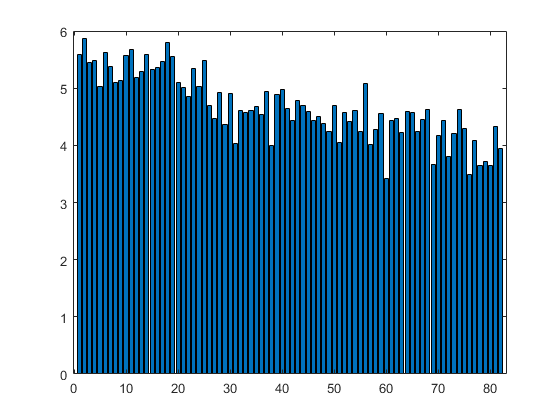

In [201]:
bar(results3.iintc)

In [12]:
results3.crconst


ans =

     1




In [13]:
Dummy = table2array(Tab1(:,19:end));

In [10]:
xx = [ones(2296,1) lk ll Dummy]; yy = ly;
results4 = ols(yy,xx);
[results4.beta results4.tstat];  % using dummies for each year

Cannot find an exact (case-sensitive) match for 'Dummy'

The closest match is: dummy in C:\Users\mcnel\Dropbox\Mytoolbox\gauss\dummy.m




Error: -1

In [207]:
results4.rsqr



ans =

    0.9656




To test the differences between the fixed and the pooled regression do an F test.  We thus test to see if the individual country differences matter

In [210]:
code = table2array(Tab1(:,1));
xx = [ones(2296,1) lk ll]; yy = ly;
size(xx)
results_fixed = pfixed([yy xx(:,2:end)],code);  % fixed effects estimation
results_pooled = ols(yy,xx);  % pooled restricted model


ans =

        2296           3




In [214]:
SSR_pooled = results_pooled.sige;
SSR_fixed = results_fixed.sige;
[SSR_pooled SSR_fixed]


ans =

    0.1368    0.0150




In [219]:
Fnum = (SSR_pooled-SSR_fixed)/82;
Fdenom = SSR_fixed/(results_fixed.nobs-84);
Fstat = Fnum/Fdenom;
Fprob =  fcdf(Fstat, 82, results_fixed.nobs-84);
1-Fprob


ans =

     0




We can reject that null hypothesis that the individual country effects do not matter.
